# Local plotting

9 May 2022

---

## Description ##

This notebook shows how to carry out geospatial visualisation locally using maptiles and data that is stored locally. This is useful when working in environments which do not allow access to external internet, such as a VM.

Currently can only produce static maps. Need to look into how to produce so-called 'slippy maps' by setting up a local map tile server.

## References


https://contextily.readthedocs.io/en/latest/working_with_local_files.html#Saving-tiles-locally


In [28]:
%matplotlib inline

import contextily as ctx
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
source_folder = 'Data/geo/'

## Load up shapefiles

In [30]:
lga_shapes = geopandas.read_file(f'{source_folder}/shapefiles/LGA_2021_AUST_GDA2020.shp')

In [31]:
sa3_shapes = geopandas.read_file(f'{source_folder}/shapefiles/SA3_2021_AUST_GDA2020.shp')

In [32]:
sa2_shapes = geopandas.read_file(f'{source_folder}/shapefiles/SA2_2021_AUST_GDA2020.shp')

In [33]:
sa2_vic = sa2_shapes.query('STE_NAME21 == "Victoria"')

In [34]:
sa3_vic = sa3_shapes.query('STE_NAME21 == "Victoria"')

In [35]:
lga_vic = lga_shapes.query('STE_NAME21 == "Victoria"')

In [36]:
sa2_gm = sa2_shapes[sa2_shapes['GCC_NAME21'] == "Greater Melbourne"]

## Create plots

### Greater Melbourne

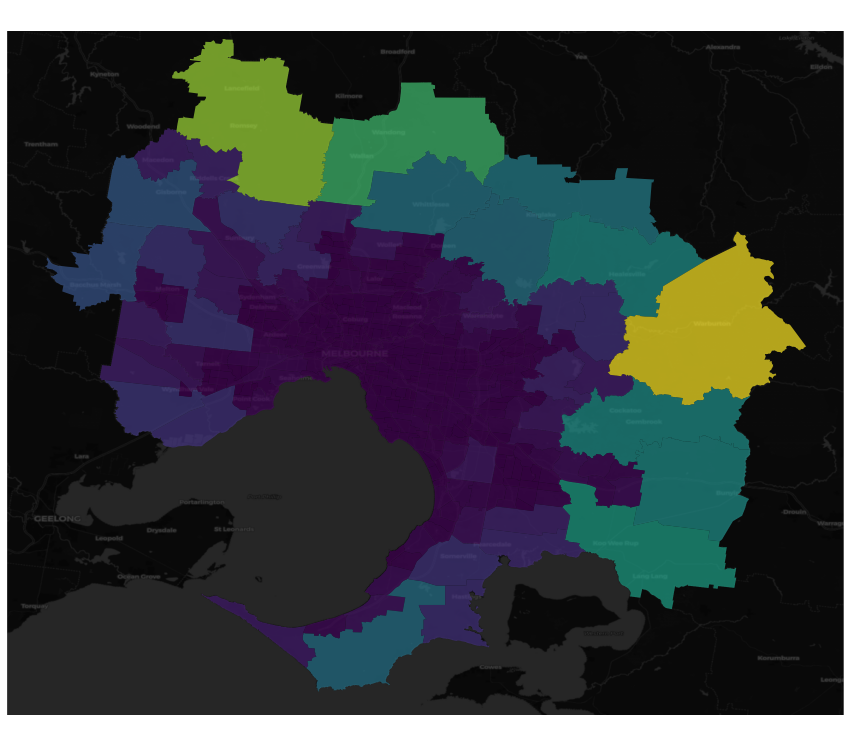

In [37]:
ax = sa2_gm.plot(figsize=(15, 15), linewidth=1, alpha=0.7, column='AREASQKM21')
ctx.add_basemap(ax, crs=sa2_gm.crs, source=f"{source_folder}/map_tiles/Region_Dark_Melbourne_vic.tiff")
ax.set_axis_off()

### Greater Dandenong

In [38]:
sa2_dande = sa2_vic[sa2_vic['SA3_NAME21'] == "Dandenong"]

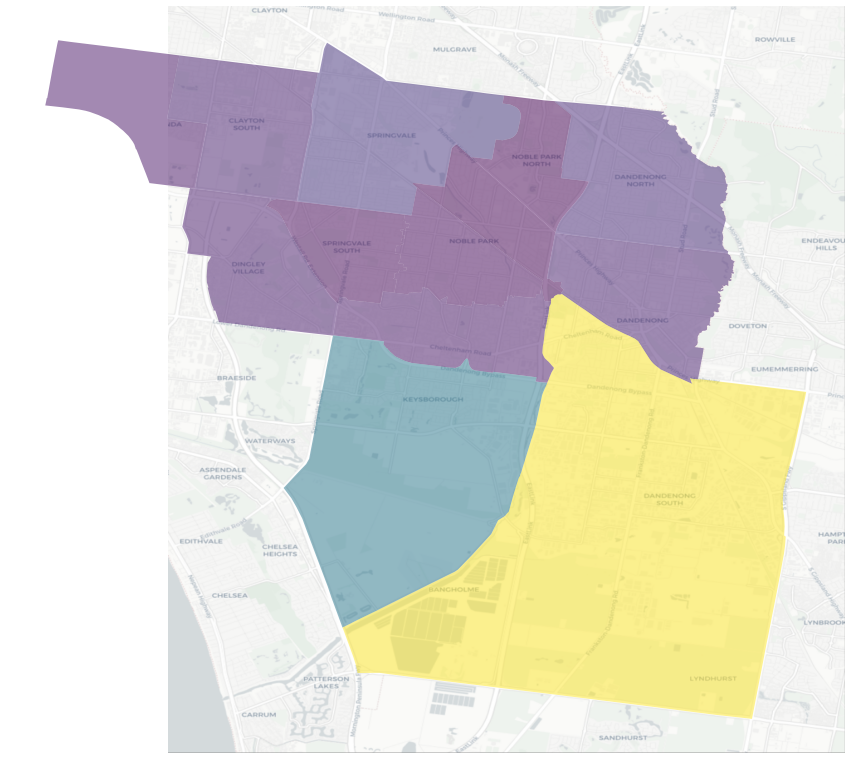

In [39]:
ax = sa2_dande.plot(figsize=(15, 15), linewidth=1, alpha=0.5, column='AREASQKM21')
ctx.add_basemap(ax, 
                crs=sa2_dande.crs, 
                source=f"{source_folder}/map_tiles/LGA_City of Greater Dandenong_vic.tiff")
ax.set_axis_off()

### Wyndham

In [40]:
sa2_wynd = sa2_vic[sa2_vic['SA3_NAME21'] == "Wyndham"]

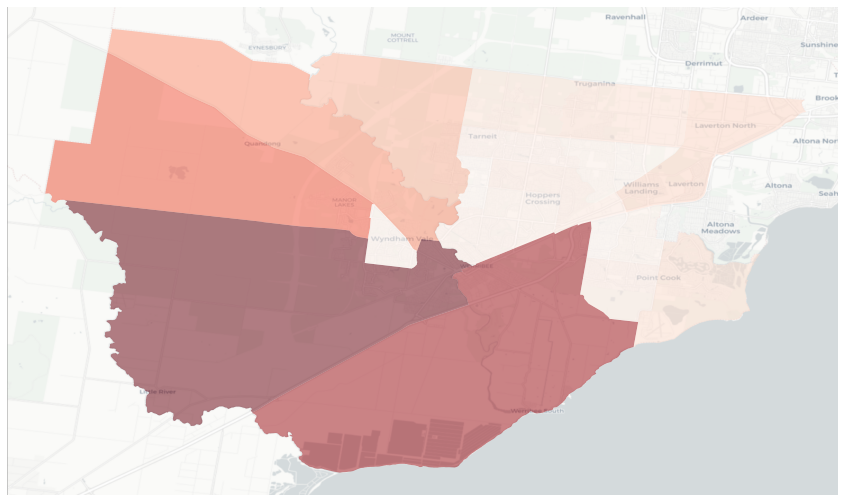

In [41]:
ax = sa2_wynd.plot(figsize=(15, 15), linewidth=1, alpha=0.5, column='AREASQKM21', cmap='Reds')
ctx.add_basemap(ax, 
                crs=sa2_wynd.crs, 
                source=f"{source_folder}/map_tiles/LGA_City of Wyndham_vic.tiff")
ax.set_axis_off()

### All Vic

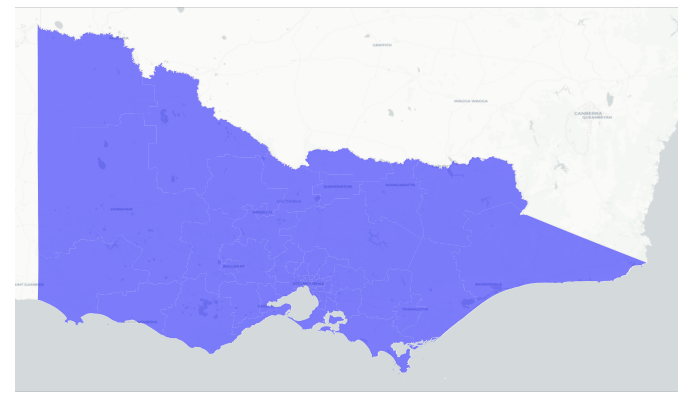

In [42]:
ax = sa3_vic.plot(figsize=(12, 12), linewidth=1, alpha=0.5, color="b")
ctx.add_basemap(ax, crs=sa3_vic.crs, source=f"{source_folder}/map_tiles/Region_vic.tiff")
ax.set_axis_off()

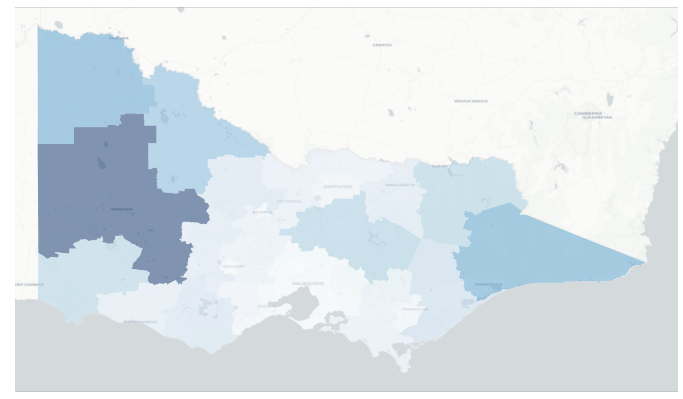

In [43]:
ax = sa3_vic.plot(figsize=(12, 14), linewidth=1, alpha=0.5, column='AREASQKM21', cmap='Blues')
ctx.add_basemap(ax, crs="EPSG:7844", source=f"{source_folder}/map_tiles/Region_vic.tiff")
ax.set_axis_off()

(140.51114921206278, 150.4269141404663, -39.41810347364373, -33.72170939953602)

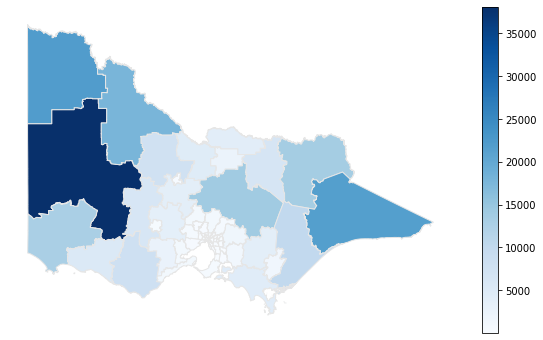

In [44]:
fig, ax = plt.subplots(1, figsize=(10,6))
sa3_vic.plot(column='AREASQKM21', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend=True)
ax.axis('off')